In [ ]:
'''
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

df = pd.read_json('historic_rates.json', lines=True)
# print(df.shape)
# df = df[['id','close','high','low','open','time','volume']]
df = df[:30000]# take first 10000 lines of data
df= df[['close']] # only look at close price
dataset = df.values.astype('float32')
# print(dataset)
# transfer the dataset to be ranged from 0-1 thus could be used in the active function
dataset = MinMaxScaler(feature_range=(0, 1)).fit_transform(dataset)
print(dataset)
'''

In [1]:
import pandas as pd
import numpy as np
from pandas.io.json import json_normalize
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Activation
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import json
import math

def data_extraction(filename):
    """
    Use for data-extraction (JSON to pandas df?)
    Including the train/test data splitting
    :return:
    """

    return dataset

def feature_engineering(df):
    """
    preprocess data for better result
    :return:
    """
def take_by_window(dataset, window):
    x, y = [], []
    for i in range(len(dataset) - window - 1):
        x.append(dataset[i:(i + window), 0])
        y.append(dataset[i + window, 0])
    x = np.array(x)
    y = np.array(y)
    x = np.reshape(x, (x.shape[0], 1, x.shape[1]))
    return x, y

def pred_model(x_train, y_train, x_test, y_test, step_size=1, num_features=10, epochs=100, batch_size=128, verbose=2):
    """
    ML model: LSTM
    Look_back: how many point
    :return:
    """

    model = Sequential()
    model.add(LSTM(4, input_shape=(step_size, num_features)))
    model.add(Dense(1))  # output file size
    model.add(Activation('tanh'))  # active function
    model.add(Dropout(0.1))  # drop out regulation
    model.compile(loss='mse', optimizer='adam')

    model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, verbose=verbose)
    score = model.evaluate(x_test, y_test, batch_size=128)
    pred_train = model.predict(x_train)
    pred_test = model.predict(x_test)

    return score, pred_train, pred_test


#if __name__ == "__main__":
    #df = pd.read_json('historic_rates.json', lines=True)
    #print(df.shape)
    

Using TensorFlow backend.


In [2]:
df = pd.read_json('historic_rates.json', lines=True)
df = df[:30000]
df= df[['close']].iloc[::-1]
dataset = df.values.astype('float32')
mms = MinMaxScaler(feature_range=(0, 1))
dataset = mms.fit_transform(dataset)

In [3]:
#dataset = data_extraction('historic_rates.json')
train_size = int(len(dataset)*0.85)
train_set, test_set = dataset[0:train_size, : ], dataset[train_size: , : ]
print(len(train_set),len(test_set),len(dataset))


21000 9000 30000


In [4]:
x_train, y_train = take_by_window(train_set, 10)
x_test, y_test = take_by_window(test_set, 10)


In [5]:
#x_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
#x_test = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))

In [6]:
score, pred_train, pred_test = pred_model(x_train, y_train, x_test, y_test, step_size=1, num_features=10, epochs=100, batch_size=128, verbose=2)
print(score)

Epoch 1/100
 - 1s - loss: 0.1836
Epoch 2/100
 - 0s - loss: 0.0472
Epoch 3/100
 - 0s - loss: 0.0468
Epoch 4/100
 - 0s - loss: 0.0456
Epoch 5/100
 - 0s - loss: 0.0447
Epoch 6/100
 - 0s - loss: 0.0430
Epoch 7/100
 - 0s - loss: 0.0431
Epoch 8/100
 - 0s - loss: 0.0437
Epoch 9/100
 - 0s - loss: 0.0438
Epoch 10/100
 - 0s - loss: 0.0425
Epoch 11/100
 - 0s - loss: 0.0405
Epoch 12/100
 - 0s - loss: 0.0424
Epoch 13/100
 - 0s - loss: 0.0423
Epoch 14/100
 - 0s - loss: 0.0414
Epoch 15/100
 - 0s - loss: 0.0431
Epoch 16/100
 - 1s - loss: 0.0431
Epoch 17/100
 - 1s - loss: 0.0425
Epoch 18/100
 - 1s - loss: 0.0429
Epoch 19/100
 - 1s - loss: 0.0409
Epoch 20/100
 - 0s - loss: 0.0422
Epoch 21/100
 - 1s - loss: 0.0441
Epoch 22/100
 - 0s - loss: 0.0421
Epoch 23/100
 - 1s - loss: 0.0421
Epoch 24/100
 - 1s - loss: 0.0443
Epoch 25/100
 - 0s - loss: 0.0432
Epoch 26/100
 - 1s - loss: 0.0435
Epoch 27/100
 - 1s - loss: 0.0411
Epoch 28/100
 - 0s - loss: 0.0409
Epoch 29/100
 - 0s - loss: 0.0426
Epoch 30/100
 - 0s - lo

In [7]:
pred_train = mms.inverse_transform(pred_train)
y_train = mms.inverse_transform(y_train)
pred_test = mms.inverse_transform(pred_test)
y_test = mms.inverse_transform(y_test)

ValueError: Expected 2D array, got 1D array instead:
array=[ 0.78782034  0.78782034  0.7890656  ...,  0.38278008  0.38278317
  0.38278008].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [7]:
window = 10
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[window:len(pred_train) + window, :] = pred_train 

In [8]:
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(pred_train) + (window * 2) + 1:len(dataset) - 1, :] = pred_test

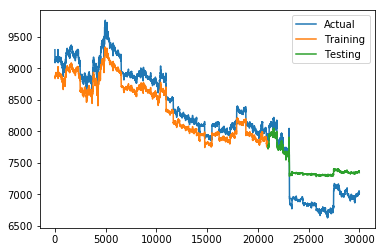

In [9]:
plt.plot(df, label='Actual')
plt.plot(pd.DataFrame(trainPredictPlot, columns=["close"], index=df.index).close, label='Training')
plt.plot(pd.DataFrame(testPredictPlot, columns=["close"], index=df.index).close, label='Testing')
plt.legend(loc='best')
plt.show()

In [15]:
trainScore = math.sqrt(mean_squared_error(y_train, pred_train[:, 0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_test, pred_test[:, 0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 204.44 RMSE
Test Score: 396.71 RMSE
